# Biodiversity Analysis #

## Introduction

The goal of this project is to analyze biodiversity data from the National Park Service, particularly around various species observed in different national park locations. 

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis. 

Here are some questions that this project has sought to answer:
* What is the distribution of conservation status for species?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which animal is mos prevalent and what is their distribution amongst parks?

##### Data Sources:####

Both `Observations.csv` and `Species_info.csv` was provided by Codecademy.com[www.codecademy.com]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
species_df = pd.read_csv('species_info.csv')
species_df.sample(10)

,category,scientific_name,common_names,conservation_status
1861,Vascular Plant,Viola X primulifolia,Primrose-Leaved Violet,NaN
5275,Vascular Plant,Orobanche uniflora,"Naked Broomrape, Naked Broom-Rape, Oneflowered...",NaN
3712,Vascular Plant,Silene latifolia,"Bladder Campion, Bladder-Campion",NaN
5365,Vascular Plant,Salix arctica,Arctic Willow,NaN
3284,Fish,Prosopium williamsoni,Mountain Whitefish,NaN
3599,Vascular Plant,Alyssum desertorum,"Desert Alyssum, Desert Madwort",NaN
5185,Vascular Plant,Trifolium gracilentum var. gracilentum,Pinpoint Clover,NaN
3468,Vascular Plant,Erigeron ursinus,"Bear Daisy, Bear River Fleabane",NaN
1988,Vascular Plant,Carex debilis var. debilis,White Edge Sedge,NaN
3100,Bird,Selasphorus platycercus,Broad-Tailed Hummingbird,NaN


In [6]:
obs_df = pd.read_csv('observations.csv')
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


<Axes: title={'center': 'Biodiversity by conservation status'}, xlabel='Consevation Status', ylabel='Count'>

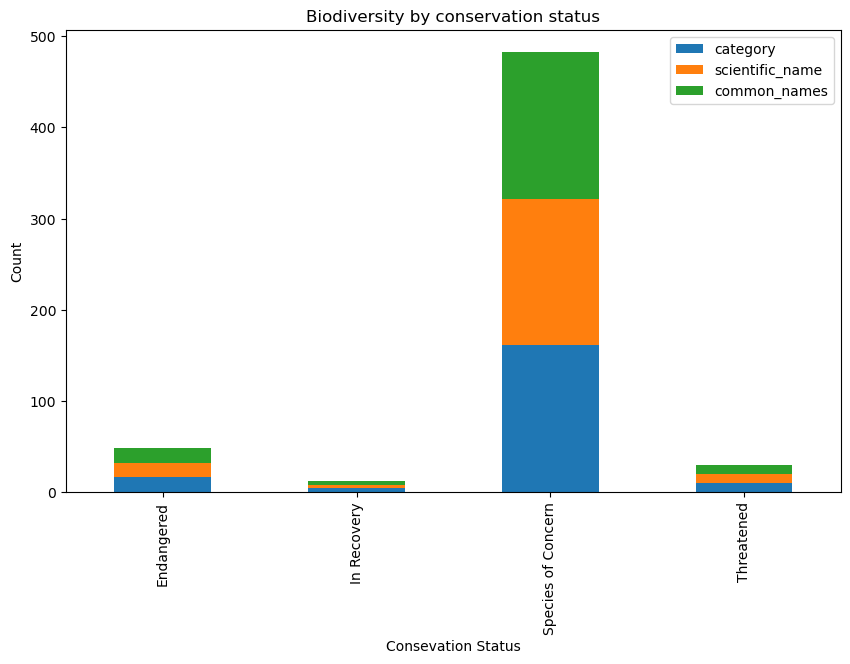

In [126]:
(species_df
#  [['conservation_status', 'category']]
#  .melt()
 .groupby('conservation_status')

 .count()
 .plot(kind='bar',
       figsize=(10,6),
       title='Biodiversity by conservation status',
       ylabel='Count',
       xlabel='Consevation Status',
       stacked=True
    )
 )